In [1]:
import torchvision.models as models

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms 

import numpy as np
from torch.autograd import Variable

import pandas as pd
from sklearn.model_selection import train_test_split

from PIL import Image
import argparse
import sys, os, shutil, random

In [55]:
x = np.random.randn(1, 3, 299, 299)

In [56]:
x = Variable(torch.from_numpy(x).float(), requires_grad=False).cuda()

In [4]:
class inception_v3(nn.Module):
    """docstring for inception_v3"""
    def __init__(self):
        super(inception_v3, self).__init__()
        self.model = models.inception_v3(pretrained=True)
        self.model.fc = nn.Linear(2048, 512)
        self.model.AuxLogits.fc = nn.Linear(768, 512)
        self.linear = nn.Linear(1024, 1)
    def forward(self, x, xx):
        #print(self.model(x)[0].size(), self.model(x)[1].size())
        x = self.model(x)[0] + self.model(x)[1]
        xx = self.model(xx)[0] + self.model(xx)[1]
        xxx= F.sigmoid(self.linear(torch.cat([x, xx], dim=1)))
        return xxx

In [5]:
model = inception_v3()
model = model.cuda()


/home/cai/miniconda3/envs/py36/lib/python3.6/site-packages/torchvision/models/inception.py:65: UserWarning: src is not broadcastable to dst, but they have the same number of elements.  Falling back to deprecated pointwise behavior.
  m.weight.data.copy_(values)


In [6]:
model(x, x)

torch.Size([1, 512]) torch.Size([1, 512])


Variable containing:
 0.4322
[torch.cuda.FloatTensor of size 1x1 (GPU 0)]

In [8]:
image = Image.open("resized_train/4.jpg")

In [7]:
image = torch.from_numpy(np.array(image).transpose(2, 0, 1)).float()

In [4]:
norm = transforms.Normalize(mean=0, std=1)

In [41]:
norm(image)

TypeError: zip argument #2 must support iteration

In [9]:
transform = transforms.Compose([
    transforms.RandomCrop(size=(100, 100))
])

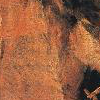

In [10]:
transform(image)